In [122]:
import json
import os
import numpy as np
import pandas as pd
import pygmo as pg
from pygmo import hypervolume
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [88]:

list_folder_paths = ['../EvolutionaryFramework/results/NSGA_II/ExpNSGA', '../EvolutionaryFramework/results/MOEA_D/ExpMOEA_D']

In [89]:
def generateJSONsNSGA(folderPath):
    target_folders = [folder for folder in os.listdir(folderPath)]

    for folder in target_folders:

        folder_averages2 = {}

        folder_path = os.path.join(folderPath, folder)
        files = os.listdir(folder_path)

        criteria = []
        result = {f"generation_{gen}": 0.0 for gen in range(0,151)} 
        resultValues = {f"generation_{gen}": [] for gen in range(0,151)} 
        count = 0 
        
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(folder_path, file)
                with open(file_path) as f:
                    parsed_json = json.load(f)

                if not criteria:
                    criteria = parsed_json["metaParameters"]['criteria']

                data = {}
                count += 1

                for elem in parsed_json:
                    if elem == "experiment":
                        for gen in parsed_json[elem]:
                            if gen != "qualityOfPopulation":
                                gen_data = []
                                for individual in parsed_json[elem][gen]["front_1"]:
                                    dictionary = {}
                                    for criterion in criteria:
                                        fitness_value = individual['fitness'][criterion]
                                        if fitness_value is not None:
                                            dictionary[criterion] = -fitness_value
                                        else:
                                            dictionary[criterion] = None
                                    gen_data.append(dictionary)

                                data[gen] = gen_data

                # Calculate hypervolume for each generation
                hyper_values = []
                for genKey, genValue in data.items():
                    data_df = pd.DataFrame(genValue)
                    data_df = data_df.dropna()
                    hyper = pg.hypervolume(data_df.to_numpy())
                    hyperValue = hyper.compute([0.0, 0.0])
                    resultValues[genKey].append(hyperValue)

        output_file = 'JSON/NSGA/' + f'hyperVolumeNSGA{folder}ALL.json'
        with open(output_file, 'w') as f:
            json.dump(resultValues, f, indent=4)

        print('Folder averages saved successfully.')

generateJSONsNSGA(list_folder_paths[0])

Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.


In [90]:
def generateJSONsMOEAD(folderPath):  
    target_folders = [folder for folder in os.listdir(folderPath)]  
    for folder in target_folders:

        folder_averages2 = {}

        folder_path = os.path.join(folderPath, folder)
        files = os.listdir(folder_path)

        criteria = []
        result = {f"generation_{gen}": 0.0 for gen in range(0,151)} 
        resultValues = {f"generation_{gen}": [] for gen in range(0,151)} 
        count = 0 
        
        for file in files:
            if file.endswith('.json'):
                file_path = os.path.join(folder_path, file)
                with open(file_path) as f:
                    parsed_json = json.load(f)

                if not criteria:
                    criteria = parsed_json["metaParameters"]['criteria']

                data = {}
                count += 1

                for elem in parsed_json:
                    if elem == "experiment":
                        for gen in parsed_json[elem]:
                            if gen != "qualityOfPopulation":
                                gen_data = []
                                for individual in parsed_json[elem][gen]:
                                    dictionary = {}
                                    for criterion in criteria:
                                        fitness_value = individual['fitness'][criterion]
                                        if fitness_value is not None:
                                            dictionary[criterion] = -fitness_value
                                        else:
                                            dictionary[criterion] = None
                                    gen_data.append(dictionary)

                                data[gen] = gen_data

                # Calculate hypervolume for each generation
                hyper_values = []
                gen0 = True
                resultValues['generation_0'].append(0.35)
                
                for genKey, genValue in data.items():
                    data_df = pd.DataFrame(genValue)
                    data_df = data_df.dropna()
                    hyper = pg.hypervolume(data_df.to_numpy())
                    hyperValue = hyper.compute([0.0, 0.0])

                    resultValues[genKey].append(hyperValue)

        output_file = 'JSON/MOEA_D/' + f'hyperVolumeMOEA_D{folder}ALL.json'
        with open(output_file, 'w') as f:
            json.dump(resultValues, f, indent=4)

        print('Folder averages saved successfully.')

generateJSONsMOEAD(list_folder_paths[1])

Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.
Folder averages saved successfully.


In [107]:
def generateData(folder_path, n1, n2):
    hypervolume_data = {}
    # folder_path = "JSON/NSGA"
    files = os.listdir(folder_path)
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(folder_path, file)
            with open(file_path) as f:
                parsed_json = json.load(f)
            data = {}
            for gen in parsed_json:
                data[gen[11:]] = parsed_json[gen]
            hypervolume_data[file_path[n1:n2]] = data
    df = pd.DataFrame(hypervolume_data)

    means_data = {}
    std_dev_data = {}
    summary_data = {}

    for experiment_name, experiment_values in df.items():
        means = []
        std_devs = []
        for generation_values in experiment_values:
            generation_mean = np.mean(generation_values)
            generation_std = np.std(generation_values)
            means.append(generation_mean)
            std_devs.append(generation_std)
        summary_data[experiment_name] = {'mean': means, 'std_dev': std_devs}

    # Create a DataFrame from the summary data dictionary
    summary_df = pd.DataFrame(summary_data)

    # Print the DataFrame with means and standard deviations
    summary_df

    return summary_df

In [117]:
nsga_df = generateData("JSON/NSGA", 25, 44)
moead_df = generateData("JSON/MOEA_D", 29, 48)

In [118]:
nsga_df

,2023_08_19_19:24:13,2023_08_19_19:16:47,2023_08_19_19:20:38,2023_08_19_19:18:32,2023_08_19_19:21:18,2023_08_19_19:19:56,2023_08_19_19:19:16,2023_08_19_19:17:45
mean,"[0.3440356382513935, 0.43811602183738446, 0.44...","[0.3532774628536469, 0.43707998103044493, 0.45...","[0.35525391011432367, 0.44751619137899024, 0.4...","[0.36008172207660827, 0.43353380668985386, 0.4...","[0.34869134343149655, 0.44366962156104617, 0.4...","[0.3493715778001672, 0.4383124744948095, 0.454...","[0.3568038734991701, 0.45038259708965783, 0.46...","[0.3459149842244411, 0.4396925245038341, 0.451..."
std_dev,"[0.030373060285501238, 0.009391409163279255, 0...","[0.020668418456021874, 0.021488089453796235, 0...","[0.030416677770021737, 0.020844576528217727, 0...","[0.02249881884348023, 0.009959495368474687, 0....","[0.03728907641768286, 0.011804220444631364, 0....","[0.03492408242045569, 0.010802216739052834, 0....","[0.025833942174602782, 0.011090176172340078, 0...","[0.03398407278035508, 0.019801943049292458, 0...."


In [119]:
moead_df

,2023_08_19_21:03:06,2023_08_19_21:04:22,2023_08_19_21:03:52,2023_08_19_21:04:15,2023_08_19_21:03:31,2023_08_19_21:04:07,2023_08_19_21:03:59,2023_08_19_21:03:40
mean,"[0.35, 0.4382834655619474, 0.47374700860346863...","[0.35, 0.44340063969976856, 0.4711777530006287...","[0.35, 0.44057081594320036, 0.4811919978965465...","[0.35, 0.46198903444424094, 0.4904934590262942...","[0.35, 0.45188145201124963, 0.4781513044041658...","[0.35, 0.4560235821152701, 0.4846087249004798,...","[0.35, 0.44649119847789376, 0.4831565590027238...","[0.35, 0.45112384309309495, 0.4817829248508974..."
std_dev,"[0.0, 0.01749851206931143, 0.01485685844747029...","[0.0, 0.014306199619875339, 0.0175829652386043...","[0.0, 0.025538188165296304, 0.0097705992162641...","[0.0, 0.015282266908291663, 0.0205421319140283...","[0.0, 0.018988341875833065, 0.0154201234662803...","[0.0, 0.010582964778438118, 0.0161768823743572...","[0.0, 0.023121596737664084, 0.0155248446632125...","[0.0, 0.02242342493525172, 0.02143600275619418..."


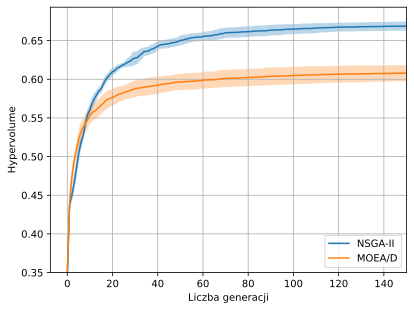

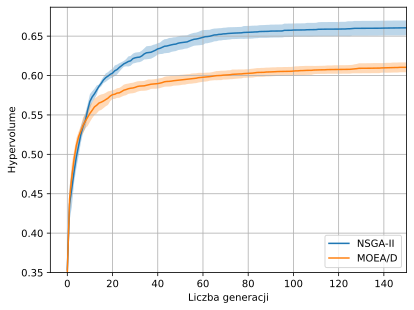

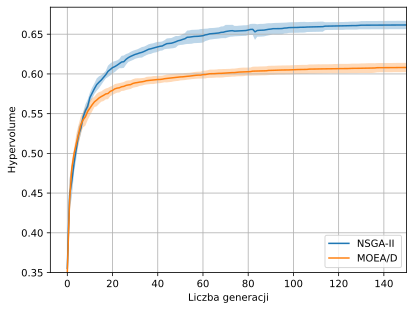

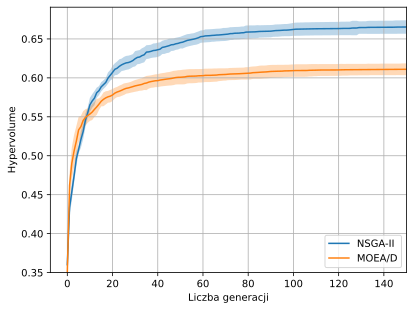

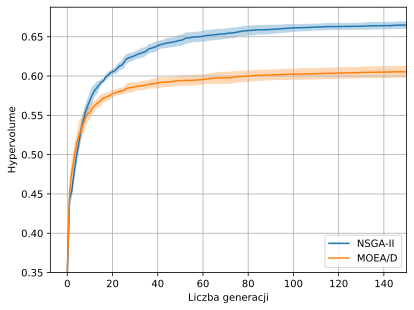

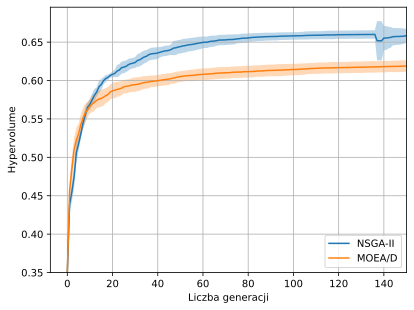

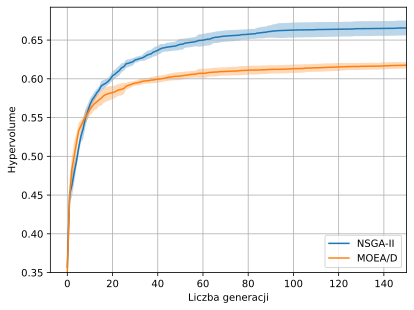

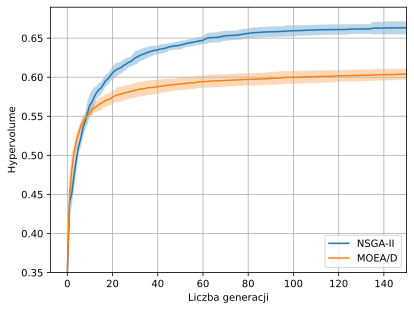

In [135]:
X = np.arange(0,151)
Y_meanNSGA = []
Y_std_devNSGA = []
for experiment_name in nsga_df.columns:
    Y_meanNSGA.append(np.array(nsga_df[experiment_name]['mean']))
    Y_std_devNSGA.append(np.array(nsga_df[experiment_name]['std_dev']))

Y_meanMOEAD = []
Y_std_devMOEAD = []
for experiment_name in moead_df.columns:
    Y_meanMOEAD.append(np.array(moead_df[experiment_name]['mean']))
    Y_std_devMOEAD.append(np.array(moead_df[experiment_name]['std_dev']))

# Print the lists Y_mean and Y_std_dev for each experiment
for mean_valuesN, std_dev_valuesN, mean_valuesM, std_dev_valuesM in zip(Y_meanNSGA, Y_std_devNSGA, Y_meanMOEAD, Y_std_devMOEAD):

    plt.plot(X, mean_valuesN, label=f"NSGA-II")
    plt.fill_between(X, mean_valuesN - std_dev_valuesN, mean_valuesN + std_dev_valuesN, alpha=0.3)
    plt.plot(X, mean_valuesM, label=f"MOEA/D")
    plt.fill_between(X, mean_valuesM - std_dev_valuesM, mean_valuesM + std_dev_valuesM, alpha=0.3)

    plt.xlabel('Liczba generacji')
    plt.ylabel('Hypervolume')

    plt.xlim(right=150)
    plt.ylim(bottom=0.35)
    plt.grid()
    plt.legend(loc='lower right')
    plt.show()





In [ ]:
folder_path2 = 'JSON/NSGA'

data = {}

for file in os.listdir(folder_path2)[:1]:

    X, Y = [],[]

    if file.endswith('.json'):
        file_path2 = os.path.join(folder_path2, file)
        with open(file_path2) as f:
            parsed_json = json.load(f)

    for gen in range(0, 151):
        X.append(gen)
        Y.append(parsed_json[f'generation_{gen}'])

    

    data[file] = (X,Y)

for file, (X, Y) in data.items():
    plt.plot(X, Y, label=file)
    plt.xlabel('Generation')
    plt.ylabel('Average Hypervolume')
    plt.title('Average Hypervolume vs. Generation')
    plt.legend()
    plt.show()

